In [3]:
pip install tephi


  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5


In [59]:
def hi(greet):
    print(greet)
    return greet+' bye!'

print(hi('hello'))
    

hello
hello bye!


In [ ]:
"""
Nov_21 = monthly_matrices('Nov_21.csv')
org_00 = Nov_21['01_00']
org_12 = Nov_21['01_12']

new_00 = Nov_21['01_00'].set_index('PRES')
new_12 = Nov_21['01_12'].set_index('PRES')

print(len(Nov_21))
## pos get each column --> one df, then get mean across rows ?? 


Jan_22 = monthly_matrices('Jan_22.csv')
#print(len(Jan_22))
#print(Jan_22)

key_names =[]
for key in Jan_22:
    key_names.append(key)

#print(key_names)

print(Jan_22[key_names[3]])

#Jan_20 = monthly_matrices('Nov_21.csv')
#print(dec_22['01_00'])

#print(Jan_20)

## now have 25 dictionaries of data 
"""
## important to get number of days --> inform how many maxtrixs per csv file 
## as two profiles per day at 00:00 and 12:00
#data_name = sonde_profile[:-4]  ## will just get rid of .csv ending


# need to make list of names of dic keys-


# open file
# loop through rows 
# make dictionary, for month, each key = day + time

### i.e. csv_name = 'Dec_22.csv'

# now we make a data frame of mean values for each variable
    #variable_list = []
    #for i in range(len(column_names)):
    #    length = len(variable_dic[column_names[i]])
    
    
#monthly_mean
        #for j in range(length):
            #print(j)
            #variable_list.append(variable_dic[column_names[i]].mean(axis=j))        
            #print(variable_dic[column_names[i]].mean(axis=1))
            
        
        #monthly_mean.insert(i,column_names[i],variable_list)
        #print(length)


In [43]:
import csv
import numpy as np
import pandas as pd
from math import trunc
import matplotlib.pyplot as plt

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
## this function takes in a mad csv file with all monthly sonde data 
## and provides a nice dictionary with all profiles seperated out
## note - missing data has occured -- thus names of profiles may not match data
## but still roughly works
def monthly_matrices(csv_name):
    
    column_names = ['PRES','HGHT','TEMP','DWPT','RELH','MIXR','DRCT','SKNT','THTA','THTE','THTV']
    whole_data = pd.read_csv(csv_name, names = column_names)    ## open the csv file (specifying the column names)
    whole_rows, whole_columns = whole_data.shape
    
    #print(whole_rows)
    
    month = csv_name[:3]
    yr = csv_name[4:6]
    
       
    ## getting correct number of days in month (according to year too) ###
    if month == 'Feb':
        if yr == 20:
            days = 29
        else:
            days = 28
    elif month == 'Nov':
        days = 30
    else:
        days = 31
            
    ########################################################################################################     
    ### okay, now need to section up the data from whole data selection
    ## firstly need to find start and end index for each section of data (just done accoring to specific values)
    start_row = []
    end_row = []
    for index, row in whole_data.iterrows():
        if whole_data.at[index,'PRES'] == 'PRES':
            start_row.append(index+3)
            
        if whole_data.at[index,'PRES'] == 'Station':
            end_row.append(index-1)
    
    #print(len(start_row))
    
    #########################  this is making list of names for dic keys  ### (2 per day 00:00 and 12:00)
    ## format of '01_00', '01_12' ... '31_00', '31_12' 
    ## for some reason, some months do not have all data, so will have to make do -- with start row / 2
    ### !!!!     the data may not align with exact date ----> missing data = problematic !!!  #####
    dic_key_names = []
    
    
    #for i in range(round(len(start_row)/2)):   -- some were odd numbers of profiles, just easier to ignore 1 
    for i in range(trunc(len(start_row)/2)):   ### use truncate instead
        i = i+1
        if i < 10:
            i = '0'+str(i)
        else:
            i = str(i)
                
        dic_key_names.append(i+'_00')
        dic_key_names.append(i+'_12')
        
    ### this is very annoying 
    #if start_row == 59:
    #    dic_key_names = dic_key_names[:-2]
    
    #print(len(dic_key_names))
    
    
    ####################################################################################################
    ## now need to split up whole data --> 2 x daily sections
    
    monthly_dic = {} ## base dictionary
        
    for i in range(len(dic_key_names)):
        monthly_dic[dic_key_names[i]] = pd.DataFrame() ## makes new dataframe for each daily x 2 sonde
        monthly_dic[dic_key_names[i]] = whole_data.iloc[start_row[i]:end_row[i],:]  ## here are splitting data --> dataframe
        monthly_dic[dic_key_names[i]] = monthly_dic[dic_key_names[i]].reset_index() ## make sure starting index for each = 0
    
        ## this is sectioning up data + put into dictionary according to start / end rows found before
        ## access each daily group of data: monthly_dic['01_00']
            
    return monthly_dic
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
## this function actually works!  ~~ to some extent, not all of it is correct, but will do

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
## new function, takes in newly made dic of montly data + produce 1 mean profile -- in one dataframe
## this will legit be a mean of all data

def month_mean(month_dic):
    column_names = ['PRES','HGHT','TEMP','DWPT','RELH','MIXR','DRCT','SKNT','THTA','THTE','THTV']
    monthly_mean = pd.DataFrame()
    variable_dic = {}
    
    key_names =[]
    for key in month_dic:
        key_names.append(key)
    
    ## here make new dic --> each variable as key 
    for i in range(len(column_names)):
        variable_dic[column_names[i]]= pd.DataFrame()
        for j in range(len(key_names)):
            variable_dic[column_names[i]].insert(j,key_names[j],month_dic[key_names[j]][column_names[i]])
    
    for j in range(len(column_names)):
        variable_list = []
        array = variable_dic[column_names[j]].to_numpy(dtype = 'float64') ## this converts each dataframe --> arrays (floats)
        ## this was the only way to get mean of rows -- normal function wasn't working
        for i in range(len(array)):    ### loop through rows + get mean (ignoring nans)
            variable_list.append(np.nanmean(array[i])) ## this is actual mean part --> may want to do some data cleaning
            ### may need to go through 
        
        monthly_mean.insert(j, column_names[j], variable_list)
        variable_list = [] 
    
            
    return monthly_mean  #variable_dic

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
##### now, final loop, getting mean across all months + years  #### 



all_months = ['Jan','Feb','Mar','Nov','Dec']
all_yrs = [22,21,20,19,18]

months_yrs_csv =[]
months_yrs = []

## make list of all the years + months csv files we have
for i in range(len(all_months)):
    for j in range(len(all_yrs)):
        months_yrs_csv.append(all_months[i]+'_'+str(all_yrs[j])+'.csv')
        months_yrs.append(all_months[i]+'_'+str(all_yrs[j]))        

print(months_yrs)

        
# this is the loop for calling both functions for each set of months
## we will make a dictionary of all values
months_yrs_dic = {}

for i in range (len(months_yrs)):
    months_yrs_dic[months_yrs[i]]= month_mean(monthly_matrices(months_yrs_csv[i]))
    print(months_yrs_csv[i]+' is done')

## print(months_yrs_dic['Jan_21']) #<-- how access the monthly mean sonde profile

#print(months_yrs_dic.keys())
## tbh, could just call month_mean() again for this new dic

ultimate_mean = month_mean(months_yrs_dic)

ultimate_mean.to_csv('mean_profile.csv', mode='w')

['Jan_22', 'Jan_21', 'Jan_20', 'Jan_19', 'Jan_18', 'Feb_22', 'Feb_21', 'Feb_20', 'Feb_19', 'Feb_18', 'Mar_22', 'Mar_21', 'Mar_20', 'Mar_19', 'Mar_18', 'Nov_22', 'Nov_21', 'Nov_20', 'Nov_19', 'Nov_18', 'Dec_22', 'Dec_21', 'Dec_20', 'Dec_19', 'Dec_18']
Jan_22.csv is done
Jan_21.csv is done
Jan_20.csv is done
Jan_19.csv is done
Jan_18.csv is done
Feb_22.csv is done
Feb_21.csv is done
Feb_20.csv is done
Feb_19.csv is done
Feb_18.csv is done
Mar_22.csv is done
Mar_21.csv is done
Mar_20.csv is done
Mar_19.csv is done
Mar_18.csv is done
Nov_22.csv is done
Nov_21.csv is done
Nov_20.csv is done
Nov_19.csv is done
Nov_18.csv is done
Dec_22.csv is done
Dec_21.csv is done
Dec_20.csv is done
Dec_19.csv is done
Dec_18.csv is done


In [ ]:
## cleaning arrays 

In [9]:
start_row = [3,5,6]
print(round(len(start_row)/2))

2


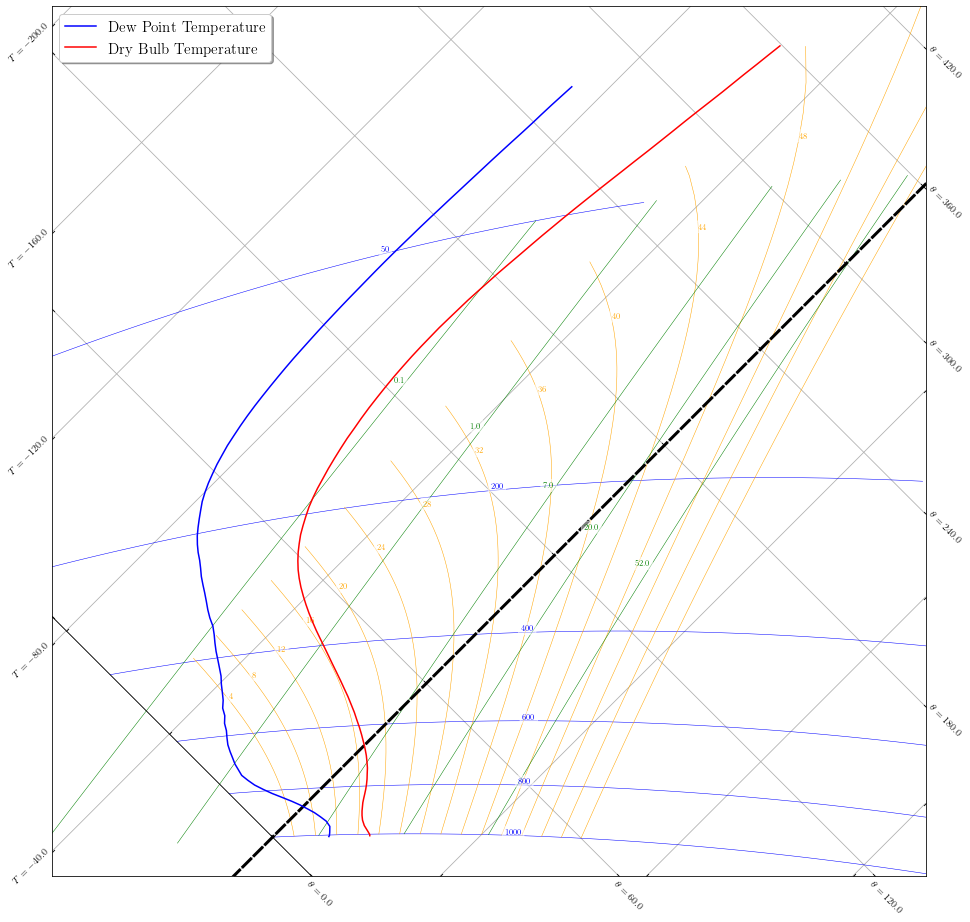

In [10]:
# https://tephi.readthedocs.io/en/latest/introduction.html
# https://github.com/SciTools/tephi  #readme

import os
import tephi
from tephi import Tephigram
import csv
import numpy as np
import pandas as pd
from math import trunc
import matplotlib.pyplot as plt
import matplotlib

mean_sonde_df = pd.read_csv('mean_profile.csv')
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')
#font = {'family' : 'normal', 'weight' : 'bold', 'size'   : 22}
font = {'family': 'serif', 'size'   : 22} 
matplotlib.rc('font', **font)


## data has to be in zip format - to plot against pressure
#print(mean_sonde_df['PRES'])
dews = zip(mean_sonde_df['PRES'], mean_sonde_df['DWPT'])
dry = zip(mean_sonde_df['PRES'], mean_sonde_df['TEMP'])

# barbs look god awful, so not included
#barbs = list(zip(data_barbs.wind_speed, data_barbs.wind_direction, data_barbs.pressure))
barbs = list(zip(mean_sonde_df['SKNT'], mean_sonde_df['DRCT'], mean_sonde_df['PRES']))

#figure = plt.figure(figsize=(6, 6))
figure = plt.figure(figsize=(16, 16))


tephigram = Tephigram(figure=figure)
tephigram.plot(dews, label="Dew Point Temperature", color="blue")
tephigram.plot(dry, label="Dry Bulb Temperature", color="red")

#profile = tephigram.plot(dews, label="Dew Point Temperature", color="blue")
#profile.barbs(barbs)

#tephigram.plot(mean_sonde_df['TEMP'], label="Dry Bulb Temperature", color="red")

figure.savefig('mean_tephi.png')

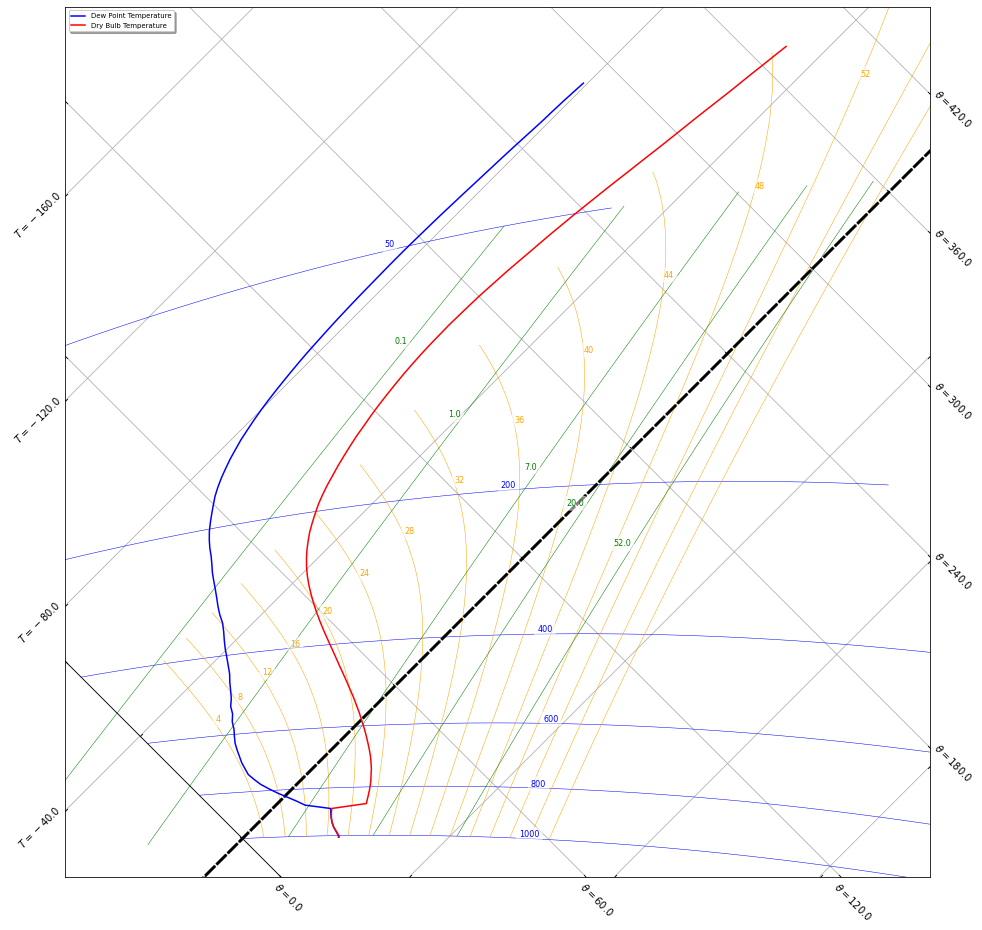

In [1]:
# https://tephi.readthedocs.io/en/latest/introduction.html
# https://github.com/SciTools/tephi#readme

import os
import tephi
from tephi import Tephigram
import csv
import numpy as np
import pandas as pd
from math import trunc
import matplotlib.pyplot as plt

mean_sonde_df = pd.read_csv('mean_profile_5.csv')


## data has to be in zip format - to plot against pressure
#print(mean_sonde_df['PRES'])
dews = zip(mean_sonde_df['PRES'], mean_sonde_df['DWPT'])
dry = zip(mean_sonde_df['PRES'], mean_sonde_df['TEMP'])

# barbs look god awful, so not included
#barbs = list(zip(data_barbs.wind_speed, data_barbs.wind_direction, data_barbs.pressure))
barbs = list(zip(mean_sonde_df['SKNT'], mean_sonde_df['DRCT'], mean_sonde_df['PRES']))

#figure = plt.figure(figsize=(8, 8))
figure = plt.figure(figsize=(16, 16))


tephigram = Tephigram(figure=figure)
tephigram.plot(dews, label="Dew Point Temperature", color="blue")
tephigram.plot(dry, label="Dry Bulb Temperature", color="red")

#profile = tephigram.plot(dews, label="Dew Point Temperature", color="blue")
#profile.barbs(barbs)

#tephigram.plot(mean_sonde_df['TEMP'], label="Dry Bulb Temperature", color="red")

figure.savefig('mean_tephi.png')

In [25]:
start_row = 59
print(round(59/2))

30


In [74]:
column_names = ['PRES','HGHT','TEMP','DWPT','RELH','MIXR','DRCT','SKNT','THTA','THTE','THTV']

for i in range(len(column_names)):
    print(i)

0
1
2
3
4
5
6
7
8
9
10


In [ ]:
"""
Nov_21 = monthly_matrices('Nov_21.csv')
org_00 = Nov_21['01_00']
org_12 = Nov_21['01_12']

new_00 = Nov_21['01_00'].set_index('PRES')
new_12 = Nov_21['01_12'].set_index('PRES')

print(len(Nov_21))
## pos get each column --> one df, then get mean across rows ?? 


Jan_22 = monthly_matrices('Jan_22.csv')
#print(len(Jan_22))
#print(Jan_22)

key_names =[]
for key in Jan_22:
    key_names.append(key)

#print(key_names)

print(Jan_22[key_names[3]])

#Jan_20 = monthly_matrices('Nov_21.csv')
#print(dec_22['01_00'])

#print(Jan_20)

## now have 25 dictionaries of data 
"""


## next set of code needs to make mean sonde profile for each month 
## vvv difficult, there is nothing constant across data --> need to make mean across rows
## will give a rough profile 

variable_dic = month_mean(monthly_matrices('Nov_21.csv'))

#print(idk['PRES'])

mean_list=[]
#for index, row in idk['PRES'].iterrows():
    
    
#idk['PRES']['mean'] = idk['PRES'].mean(axis=1, numeric_only=True)
#new = idk['PRES'].mean(axis='columns')
#print(idk['PRES'])

#print(idk['PRES'].mean())
#rows, columns = idk['PRES'].shape
#print(idk['PRES'].iloc[1,:])


## can convert the data frame --> array

## !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
column_names = ['PRES','HGHT','TEMP','DWPT','RELH','MIXR','DRCT','SKNT','THTA','THTE','THTV']
monthly_mean = pd.DataFrame()


    

#column_names = ['PRES','HGHT','TEMP','DWPT','RELH','MIXR','DRCT','SKNT','THTA','THTE','THTV']
#for column in column_names:
#    j = 0
#    print(j)
#    j += 1 

plt.plot(monthly_mean['TEMP'])
plt.show()

print(monthly_mean['DWPT'])

#array = idk['PRES'].to_numpy(dtype = 'float16')
#print(array[1])
#print(len(array))
## !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! this will get mean of each row


#print(array[20])
#print(np.mean(array[20]))


#print(rows)
#print(columns)

#print(np.mean(idk['PRES']))


#for column in idk['PRES']:
#    for i in range(len(idk['PRES'])):
#        print(column[i])
## idk know why but doesnt want to do mean along rows??

#print(len(idk['HGHT']))
#print(idk)

#lol = monthly_matrices('Nov_21.csv')
#print(lol['01_00'])


#lol = lol.drop(['index'], axis = 1)
#lol['01_00']['mean']= lol['01_00'].mean(axis='columns')
#

#del lol['01_00']['index']

